###
Authors: 
1. Shitiz Kumar Gupta
2. Keegan Nunes
3. Shrey Agarwal
4. Shashvath Arun 
###


In [5]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [56]:
spotify_ds = pd.read_csv("dataset.csv")

In [57]:
#basic data cleaning
pd.isnull(spotify_ds).sum()
spotify_ds.drop_duplicates()
spotify_ds.dropna()
spotify_ds

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [36]:
spotify_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

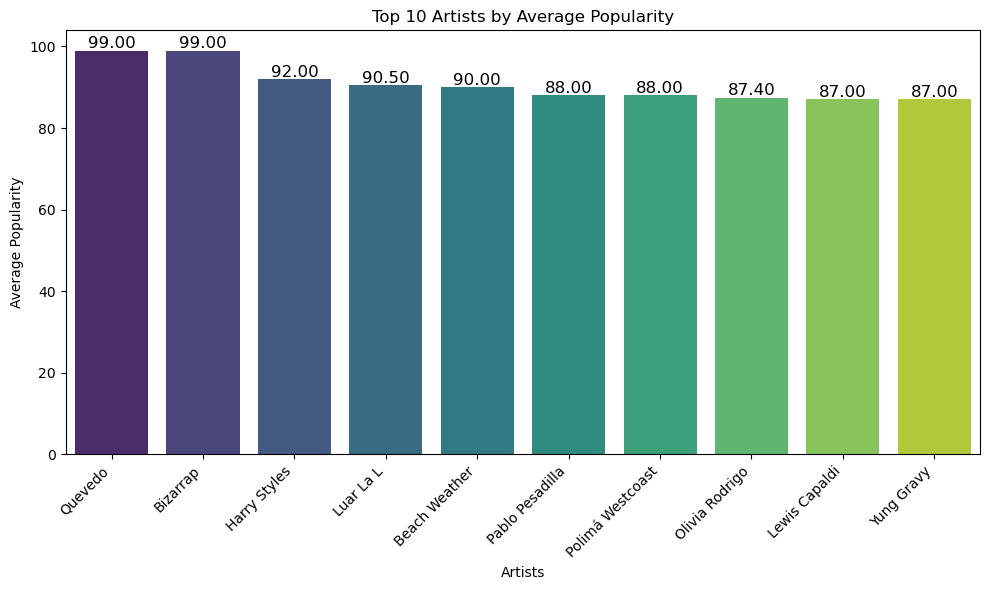

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Split artists by ";" and explode them into individual rows
spotify_ds['artists_split'] = spotify_ds['artists'].str.split(';')  # Split by ';'
spotify_exploded = spotify_ds.explode('artists_split')  # Expand each artist to a separate row
spotify_exploded.rename(columns={'artists_split': 'artist'}, inplace=True)  # Rename column for clarity
average_popularity_all = spotify_exploded.groupby('artist')['popularity'].mean()
top_10_artists_by_popularity = average_popularity_all.sort_values(ascending=False).head(10)

#Create a bar plot for the top 10 artists and their average popularity
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_artists_by_popularity.index, 
                 y=top_10_artists_by_popularity.values, 
                 palette="viridis",hue = top_10_artists_by_popularity.index)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Artists')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



[Text(0.5, 1.0, 'Energy vs Loudness')]

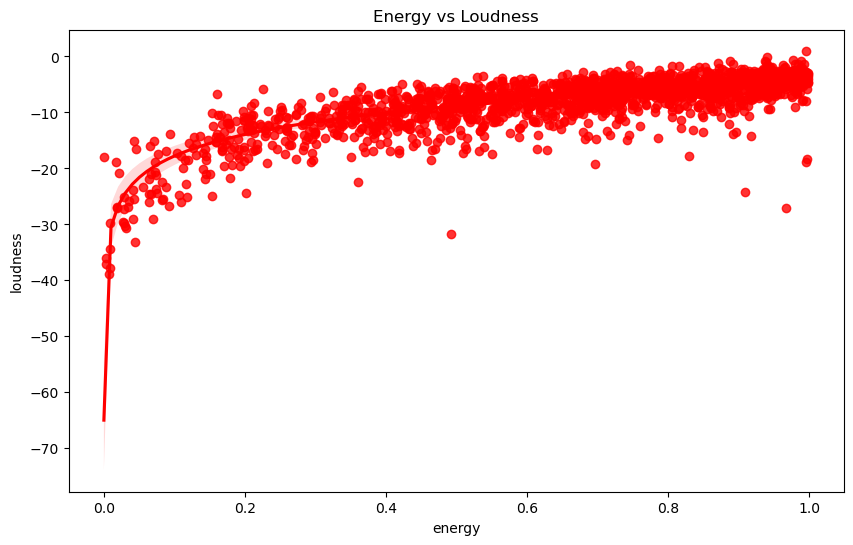

In [10]:
#taking a random sample
sample_spotify_ds = spotify_ds.sample(int(0.015*len(spotify_ds)))

plt.figure(figsize=(10, 6))
sns.regplot(x='energy', y='loudness', data=sample_spotify_ds, color='red', logx=True).set(title='Energy vs Loudness')

In [26]:
print(spotify_ds['artists'].dtype)


float64


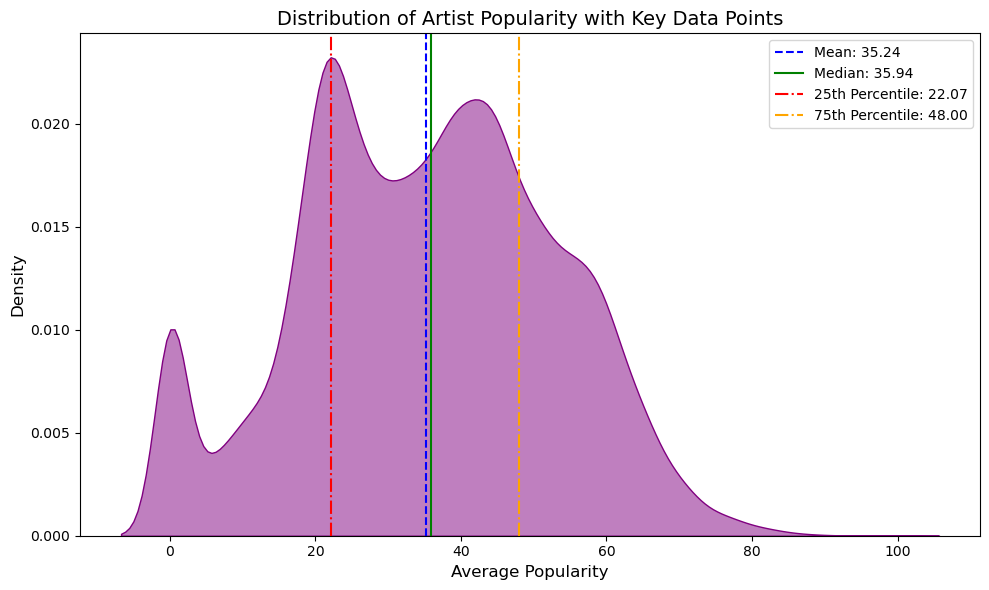

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

spotify_ds['artists'] = spotify_ds['artists'].str.split(';')  # Split artists by comma and space
exploded_ds = spotify_ds.explode('artists')  # Create a row for each artist

# Step 3: Calculate average popularity for each artist
artist_avg_popularity = exploded_ds.groupby('artists')['popularity'].mean().reset_index()
artist_avg_popularity.rename(columns={'popularity': 'Average_Popularity'}, inplace=True)

# Step 4: Calculate statistical values for the distribution
mean_popularity = artist_avg_popularity['Average_Popularity'].mean()
median_popularity = artist_avg_popularity['Average_Popularity'].median()
percentile_25 = np.percentile(artist_avg_popularity['Average_Popularity'], 25)
percentile_75 = np.percentile(artist_avg_popularity['Average_Popularity'], 75)

# Step 5: Plot the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=artist_avg_popularity, x='Average_Popularity', fill=True, color='purple', alpha=0.5)

# Add lines for mean, median, and percentiles
plt.axvline(mean_popularity, color='blue', linestyle='--', label=f'Mean: {mean_popularity:.2f}')
plt.axvline(median_popularity, color='green', linestyle='-', label=f'Median: {median_popularity:.2f}')
plt.axvline(percentile_25, color='red', linestyle='-.', label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color='orange', linestyle='-.', label=f'75th Percentile: {percentile_75:.2f}')

# Add titles and labels
plt.title('Distribution of Artist Popularity with Key Data Points', fontsize=14)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('density.png',format = 'png')
plt.show()


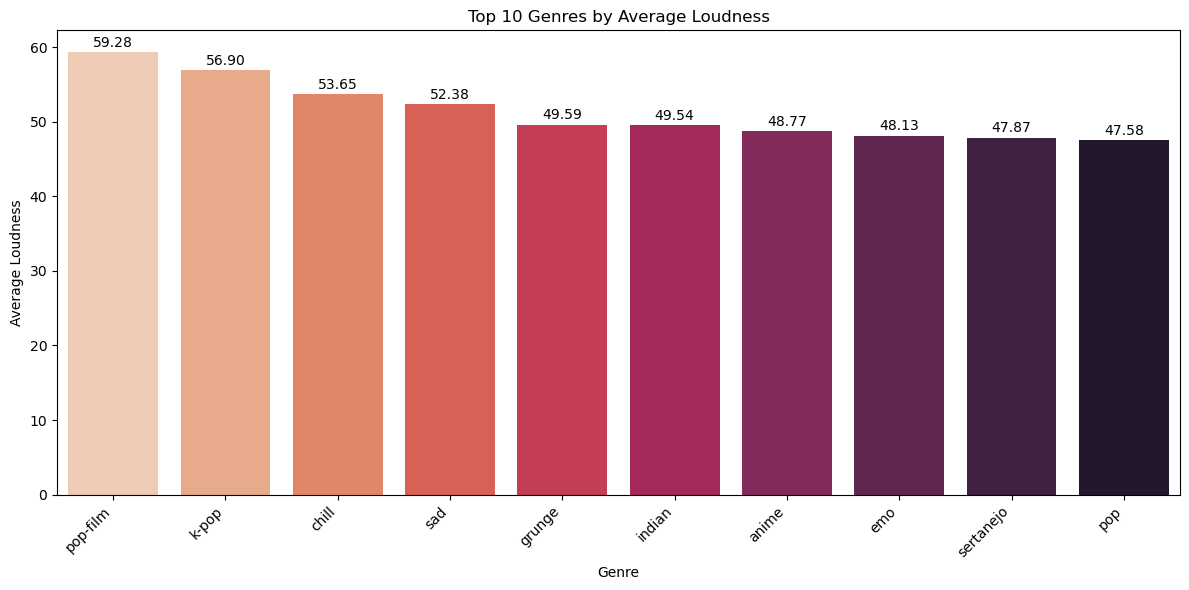

In [48]:
genres_expanded = spotify_ds['track_genre'].explode()
genre_loudness = spotify_ds.groupby('track_genre')['popularity'].mean()
top_10_genres_by_loudness = genre_loudness.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres_by_loudness.index, y=top_10_genres_by_loudness.values, palette='rocket_r',hue = top_10_genres_by_loudness.index)
for i, value in enumerate(top_10_genres_by_loudness.values):
    plt.text(
        i,  # x-coordinate
        value + 0.3,  # y-coordinate (slightly above the bar)
        f'{value:.2f}',  # Text value rounded to 2 decimals
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size
        color='black'  # Text color
    )
plt.xlabel('Genre')
plt.ylabel('Average Loudness')
plt.title('Top 10 Genres by Average Loudness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

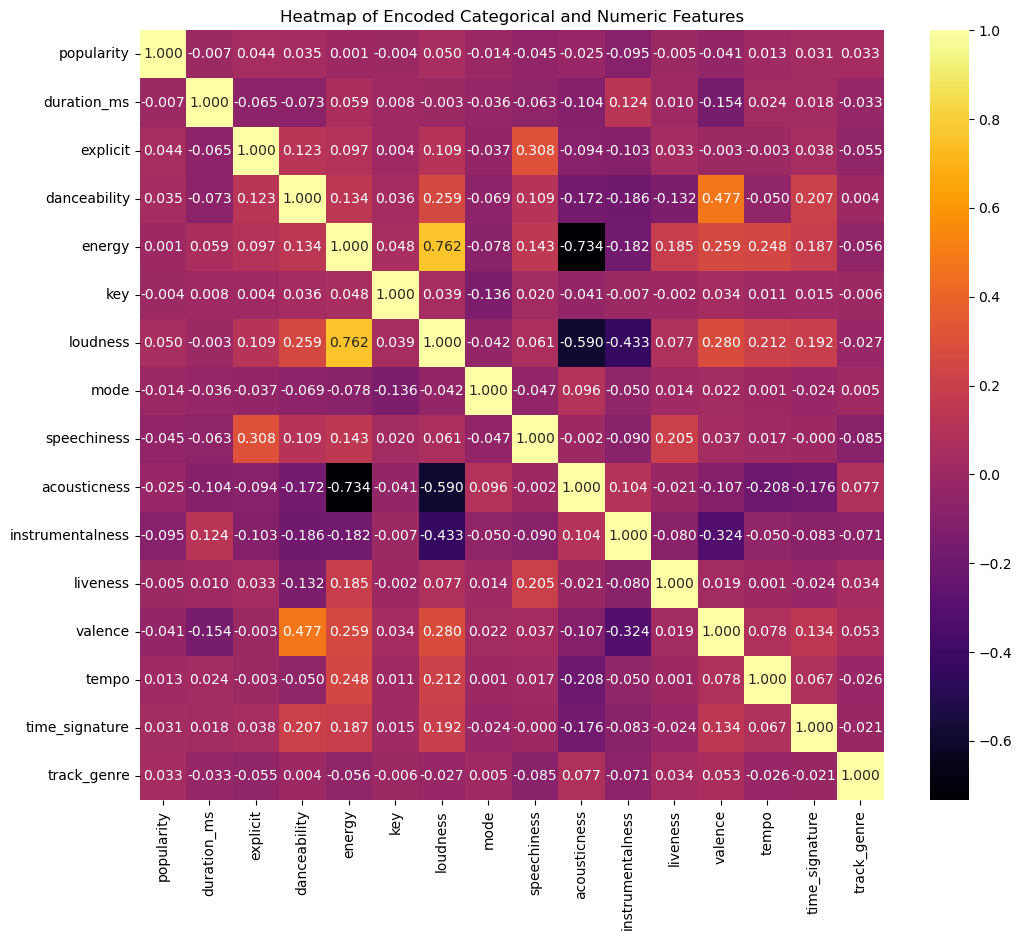

In [60]:
new_spotify= spotify_ds.drop(columns=['track_id','artists','album_name','track_name'])
le = LabelEncoder()
label_encoders = {}
for column in new_spotify.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    new_spotify[column] = le.fit_transform(new_spotify[column])
    label_encoders[column] = le

corr_matrix = new_spotify.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".3f")
plt.title("Heatmap of Encoded Categorical and Numeric Features")
plt.show()

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score

df = spotify_ds.copy()

def prepare_features(df):
    feature_cols = [
        'danceability', 'energy', 'key', 'loudness', 'mode', 
        'speechiness', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'time_signature'
    ]
    
    X = df[feature_cols]
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    genre_dummies = pd.get_dummies(df['track_genre'])
    X_with_genre = np.hstack([X_scaled, genre_dummies.values])
    
    return X_with_genre

def get_recommendations(df, X_with_genre, song_idx, n_recommendations=5):
    similarities = cosine_similarity([X_with_genre[song_idx]], X_with_genre)
    selected_song_name = df.iloc[song_idx]['track_name']
    different_names_mask = df['track_name'] != selected_song_name
    masked_similarities = similarities[0] * different_names_mask
    similar_indices = masked_similarities.argsort()[::-1][:n_recommendations]
    recommendations = df.iloc[similar_indices][['track_name', 'artists', 'album_name', 'track_genre']]
    recommendations['similarity_score'] = similarities[0][similar_indices]
    
    return recommendations

In [64]:
#For streamlit code check stream.py

In [66]:
#We have not focused much on EDA. Our main goal was Music reccomendation system 